Saved: /home/david/thesis/figures/Fig01_GRB_T90_hist.png


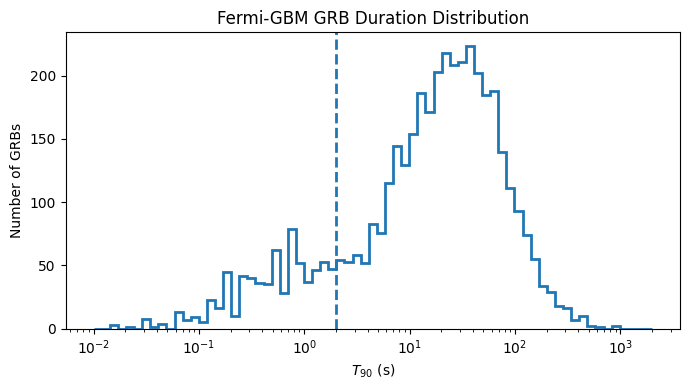

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path.home()/ "thesis"
grb = pd.read_csv(BASE/"data/processed/grb/grb_gbm_clean.csv", low_memory=False)

t90 = pd.to_numeric(grb["T90"], errors="coerce")
t90 = t90[(t90 > 0) & np.isfinite(t90)]

plt.figure(figsize=(7,4))
bins = np.logspace(np.log10(0.01), np.log10(2000), 70)
plt.hist(t90, bins=bins, histtype="step", linewidth=2)
plt.axvline(2.0, linestyle="--", linewidth=2)

plt.xscale("log")
plt.xlabel(r"$T_{90}$ (s)")
plt.ylabel("Number of GRBs")
plt.title("Fermi-GBM GRB Duration Distribution")
plt.tight_layout()

out = BASE/"figures/Fig01_GRB_T90_hist.png"
plt.savefig(out, dpi=300)
print("Saved:", out)
plt.show()


Saved: /home/david/thesis/figures/Fig02_GRB_fluence_vs_T90.png


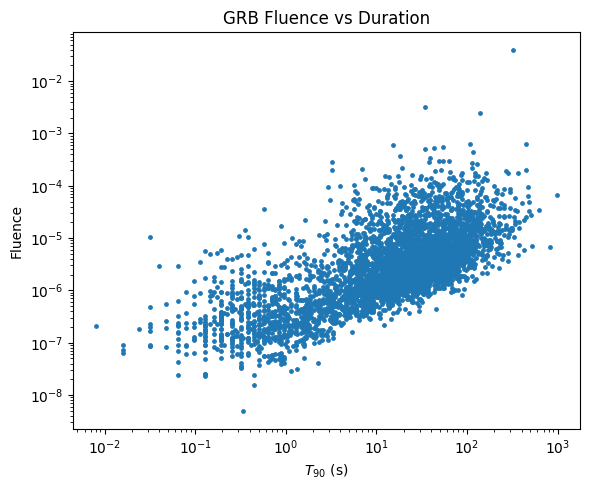

In [2]:
flu = pd.to_numeric(grb.get("FLUENCE"), errors="coerce")
m = np.isfinite(t90) & np.isfinite(flu) & (flu > 0)

plt.figure(figsize=(6,5))
plt.scatter(t90[m], flu[m], s=6)
plt.xscale("log"); plt.yscale("log")
plt.xlabel(r"$T_{90}$ (s)")
plt.ylabel("Fluence")
plt.title("GRB Fluence vs Duration")
plt.tight_layout()

out = BASE/"figures/Fig02_GRB_fluence_vs_T90.png"
plt.savefig(out, dpi=300)
print("Saved:", out)
plt.show()
